# Max Flow Problem

Given a graph $G = (N,A)$ with arc capacities $u_{ij} \geq 0$, find the **Maximum (s,t)-Flow**.

## Variables:

$$
x_{ij} = \text{\{ quantity of flow x carried by arc $(i,j)$ \}} 
$$

$$
u_{ij} = \text{\{ maximum units of flow carried by arc $(i,j)$ \}}
$$


## Formulation:

\begin{eqnarray}
max && k = \sum_{(s,i) \in A} x_{si}-\sum_{(i,s) \in A} x_{is} \\
s.t.\\
\sum_{(i,j) \in \delta(i)^{+}} x_{ij} - \sum_{(j,i) \in \delta(i)^{-}} x_{ji} = 0 , &&&& \forall i \neq \{s,t\} && \text{( Balance constraints )} \\ 
0 \leq x_{ij} \leq u_{ij} , &&&& \forall (i,j) \in A && \text{( Capacity constraints )}\\
x_{ij} \in \mathbb{Z}_{+} &&&&&& \text{( Integrality constraint )}
\end{eqnarray}

In [27]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
G = nx.DiGraph()

In [29]:
G.add_nodes_from([1,2,3,4,5,6])

In [30]:
G.add_edges_from([ (1,2,{'capacity':20}),(1,4,{'capacity':25}),(2,3,{'capacity':20}),(4,5,{'capacity':15}),(3,6,{'capacity':15}),(5,6,{'capacity':10}),(3,5,{'capacity':10}),(4,2,{'capacity':8}) ])

G:
edges (capacity)


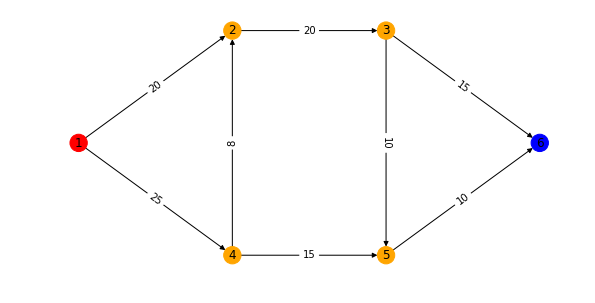

In [31]:
plt.figure(figsize=(10,5))

plt.axis('off')

pos = {1:(0,1),2:(1,2),3:(2,2),4:(1,0),5:(2,0),6:(3,1)}

node_labels = {i:i for i in G.nodes()}
edge_labels = {(u,v):G[u][v]['capacity'] for u,v in G.edges()}

nx.draw_networkx_nodes(G,pos, node_color=['red','orange','orange','orange','orange','blue'])
nx.draw_networkx_edges(G,pos, edge_color='black')
nx.draw_networkx_labels(G,pos,labels=node_labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

print("G:")
print("edges (capacity)")

In [32]:
maxflow = gb.Model()

In [33]:
x = maxflow.addVars(((u,v) for u,v in G.edges()), lb = +0.0, vtype=gb.GRB.INTEGER,name='x')

In [34]:
k = x.sum(1,'*') - x.sum('*',1)

maxflow.setObjective(k,gb.GRB.MAXIMIZE)

In [35]:
# balance constraints
for i in G.nodes():
    if (i != 1) and (i != 6):
        name = "balance_%s" % (i)
        maxflow.addConstr(x.sum('*',i) - x.sum(i,'*') == 0, name=name)

In [36]:
# capacity constraints
for u,v in G.edges():
    name = "capacity_%s_%s" % (u,v)
    maxflow.addConstr(x[u,v] <= G[u][v]['capacity'], name=name)

In [37]:
maxflow.update()

In [38]:
maxflow.write('maxflow.lp')

In [39]:
maxflow.optimize()

Optimize a model with 12 rows, 8 columns and 20 nonzeros
Variable types: 0 continuous, 8 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 3e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 12 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 4 available processors)

Solution count 2: 25 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%


In [40]:
print("Obj:", maxflow.ObjVal,end='\n\n')

for i in maxflow.getVars():
    print("%s = %g" % (i.VarName,i.x))

Obj: 25.0

x[1,2] = 15
x[1,4] = 10
x[2,3] = 15
x[3,6] = 15
x[3,5] = -0
x[4,5] = 10
x[4,2] = -0
x[5,6] = 10


In [41]:
for u,v in G.edges():
    var = maxflow.getVarByName("x[%d,%d]" % (u,v))
    G.add_edge(u,v,flow=var.x)

In [42]:
G.edges(data=True)

OutEdgeDataView([(1, 2, {'capacity': 20, 'flow': 15.0}), (1, 4, {'capacity': 25, 'flow': 10.0}), (2, 3, {'capacity': 20, 'flow': 15.0}), (3, 6, {'capacity': 15, 'flow': 15.0}), (3, 5, {'capacity': 10, 'flow': -0.0}), (4, 5, {'capacity': 15, 'flow': 10.0}), (4, 2, {'capacity': 8, 'flow': -0.0}), (5, 6, {'capacity': 10, 'flow': 10.0})])

sol G:
edges (flow,capacity)


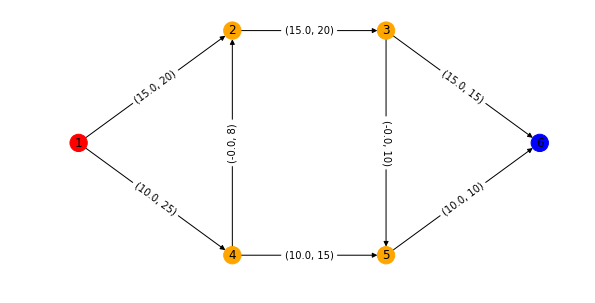

In [43]:
plt.figure(figsize=(10,5))

plt.axis('off')

pos = {1:(0,1),2:(1,2),3:(2,2),4:(1,0),5:(2,0),6:(3,1)}

node_labels = {i:i for i in G.nodes()}
edge_labels = {(u,v):(G[u][v]['flow'],G[u][v]['capacity']) for u,v in G.edges()}

nx.draw_networkx_nodes(G,pos, node_color=['red','orange','orange','orange','orange','blue'])
nx.draw_networkx_edges(G,pos, edge_color='black')
nx.draw_networkx_labels(G,pos,labels=node_labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

print("sol G:")
print("edges (flow,capacity)")

In [44]:
flowvalue,flows = nx.maximum_flow(G,1,6,capacity='capacity')

In [45]:
print("flow:",flowvalue)

flow: 25


In [46]:
print(flows)

{1: {2: 7, 4: 18}, 2: {3: 15}, 3: {6: 15, 5: 0}, 4: {5: 10, 2: 8}, 5: {6: 10}, 6: {}}
